#Question 1#

##Provide a statistical summary of the data using data visualization.##

In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Load the dataset
file_path = "ObesityDataSet_raw_and_data_sinthetic.csv"
data = pd.read_csv(file_path)

#Display first 5 rows
data.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


###Data visualization by matplotlib###

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

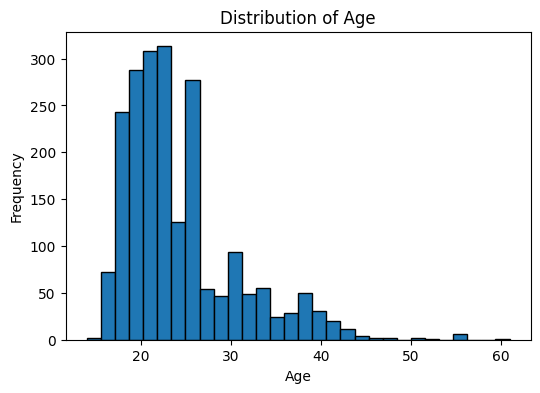

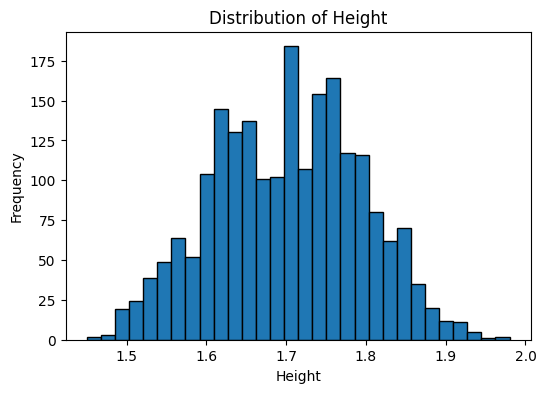

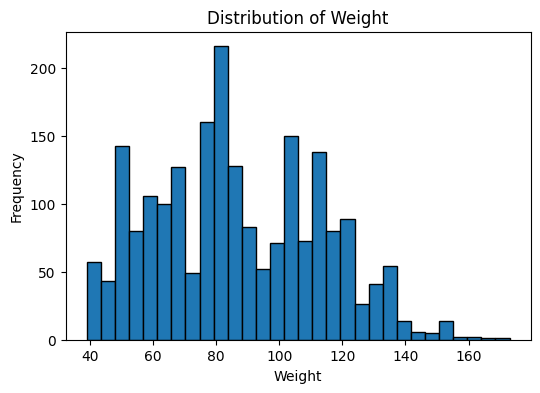

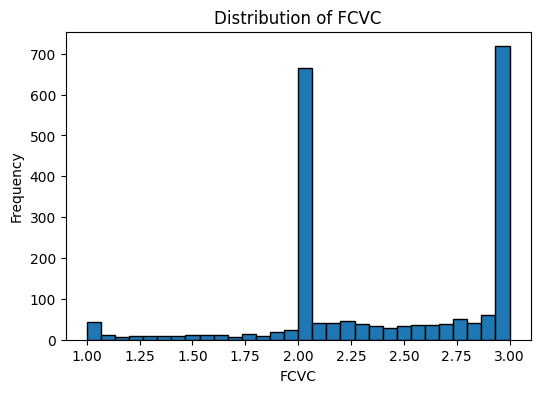

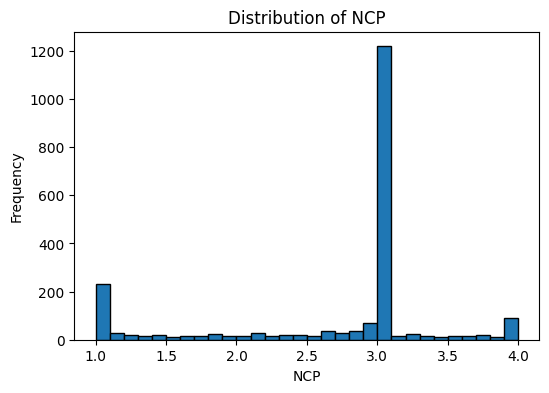

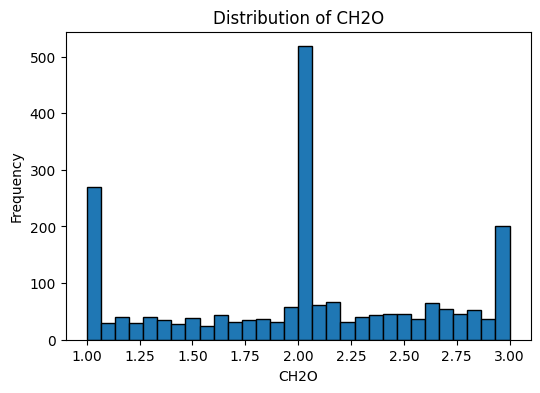

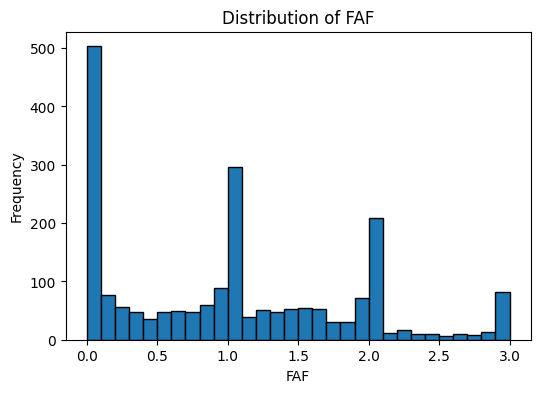

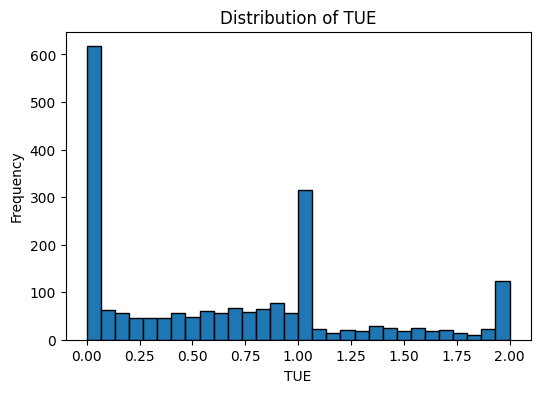

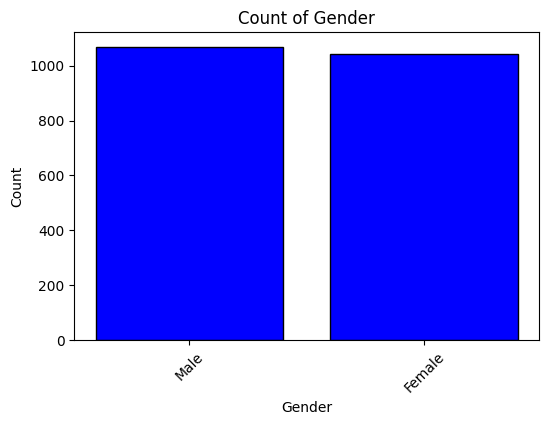

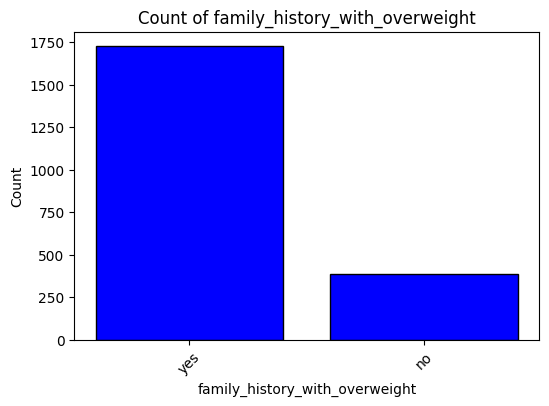

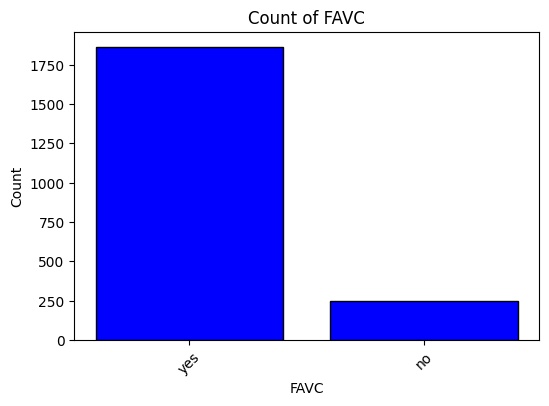

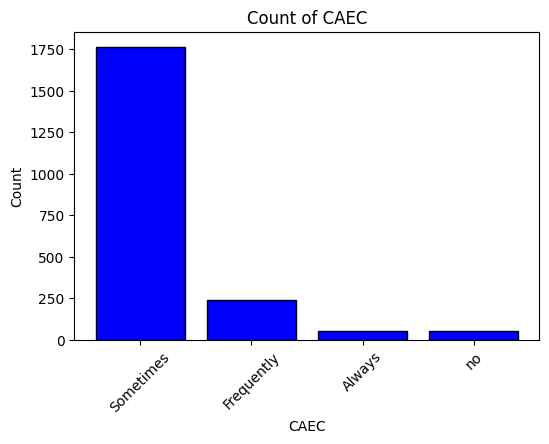

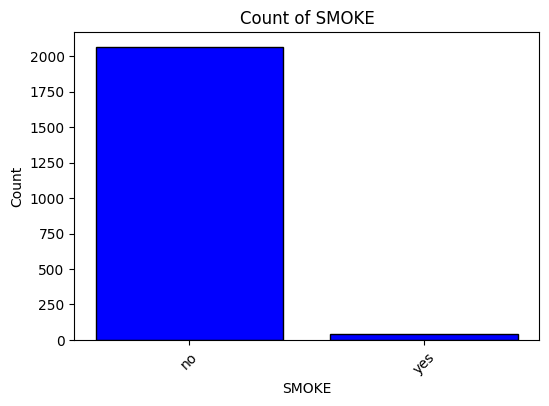

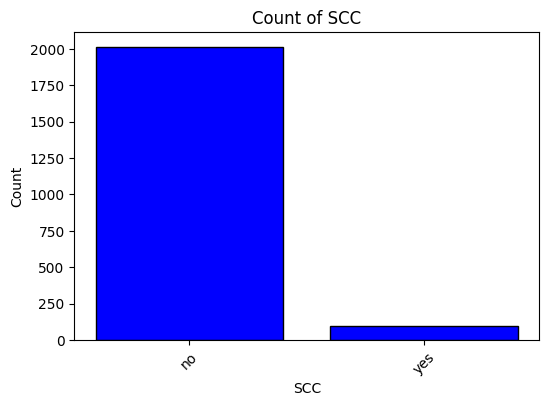

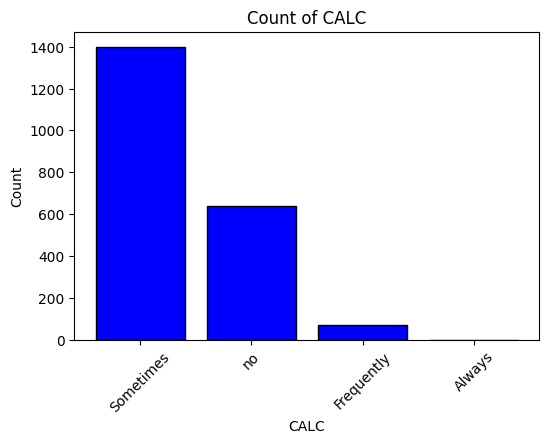

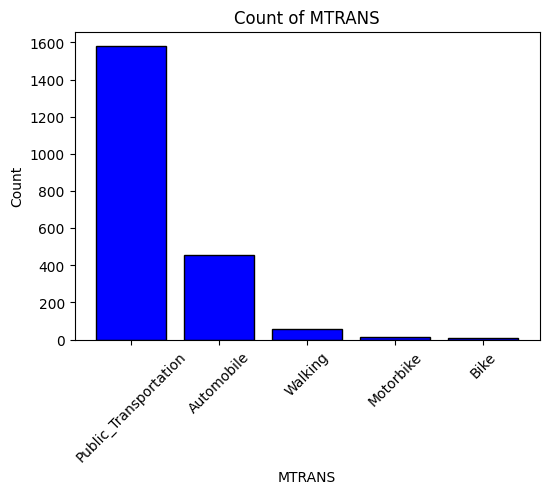

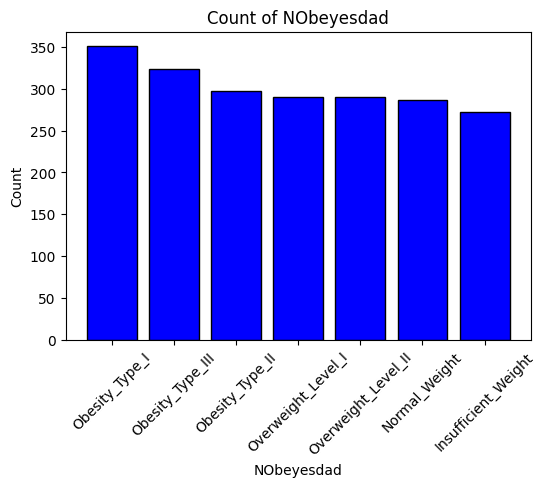

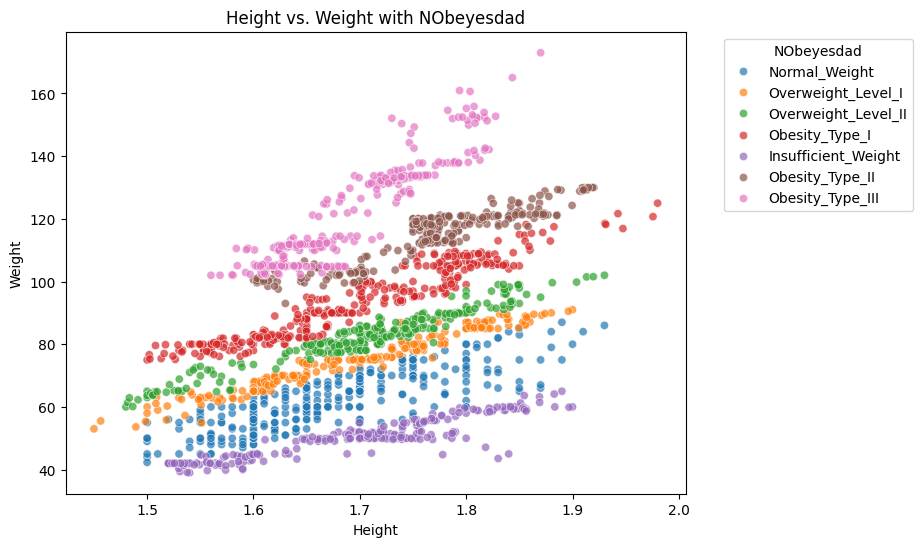

In [21]:
# Display info
data.info()

# Visualize the distribution of numerical features
numerical_features = data.select_dtypes(include=['float64', 'int64']).columns
for feature in numerical_features:
    plt.figure(figsize=(6, 4))
    plt.hist(data[feature].dropna(), bins=30, edgecolor='black')
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()

# Visualize the distribution of categorical features
categorical_features = data.select_dtypes(include=['object']).columns
for feature in categorical_features:
    plt.figure(figsize=(6, 4))
    # Count the number of values ​​of each type in the taxonomy attribute
    value_counts = data[feature].value_counts()
    plt.bar(value_counts.index, value_counts.values, color='blue', edgecolor='black')
    plt.title(f'Count of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()

# Analyze the relationship between 'Height' and 'Weight' with the target variable 'NObeyesdad'
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Height', y='Weight', hue='NObeyesdad', data=data, alpha=0.7)
plt.title('Height vs. Weight with NObeyesdad')
plt.xlabel('Height')
plt.ylabel('Weight')
plt.legend(title='NObeyesdad', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

##Preprocess the data: type conversion and data normalization.##

In [51]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Step 1: Copy original data
data_processed = data.copy()

# Step 2: Convert categorical variables to input features
label_encoder = LabelEncoder()
binary_vars = ['Gender', 'family_history_with_overweight', 'FAVC', 'SMOKE', 'SCC']

# Apply LabelEncoder to binary variables
for var in binary_vars:
    data_processed[var] = label_encoder.fit_transform(data_processed[var])

task_type = input("Please enter the task type ('classification' or 'regression'): ").strip().lower()

if task_type == "classification":
    # Use get_dummies for multi-class input variables (except 'NObeyesdad' which is the target column)
    data_processed = pd.get_dummies(data_processed, columns=['CAEC', 'CALC', 'MTRANS'], drop_first=True)

    # Keep the input features in X
    X = data_processed.drop('NObeyesdad', axis=1)
    # Split the target variable 'NObeyesdad' and convert it to numeric labels if needed
    y = label_encoder.fit_transform(data_processed['NObeyesdad'])  # Encoding the target variable

    # Step 3: Standardize continuous variables
    scaler = StandardScaler()
    continuous_vars = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']
    X[continuous_vars] = scaler.fit_transform(X[continuous_vars])

    # filtered_data = data_processed[['NObeyesdad']]
    # filtered_data.head()
elif task_type == "regression":
    data_processed = pd.get_dummies(data_processed, columns=['CAEC', 'CALC', 'MTRANS','NObeyesdad'], drop_first=True)

    X = data_processed.drop('Weight', axis=1)
    y = data_processed['Weight']

    # Step 3: Standardize continuous variables
    scaler = StandardScaler()
    continuous_vars = ['Age', 'Height','FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']
    X[continuous_vars] = scaler.fit_transform(X[continuous_vars])

    # filtered_data = data_processed[['Weight']]
    # filtered_data.head()

Please enter the task type ('classification' or 'regression'): classification


##Split the data into training and evaluation sets.##



In [52]:
from sklearn.model_selection import train_test_split

if task_type == "classification":
  X_train, X_eval, y_train, y_eval = train_test_split(X, y, test_size=0.2, random_state=42,stratify=y)
elif task_type == "regression":
  X_train, X_eval, y_train, y_eval = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the size of the data sets
print("Train set size (X_train):", X_train.shape)
print("Evaluation set size (X_eval):", X_eval.shape)
print("Train set size (y_train):", y_train.shape)
print("Evaluation set size (y_eval):", y_eval.shape)

Train set size (X_train): (1688, 23)
Evaluation set size (X_eval): (423, 23)
Train set size (y_train): (1688,)
Evaluation set size (y_eval): (423,)


##Perform classification (and regression) and Evaluate, compare the results of the methods: compare classification methods with each other; compare regression methods with each other. Use charts to visually display the comparison.##

###Train Classification###

In [53]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Train k-Nearest Neighbors (k-NN) Classifier
knn = KNeighborsClassifier(n_neighbors=3)  #k=3
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_eval)

# Train Decision Tree Classifier
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_eval)

# Train Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_eval)


###Perform Classification###

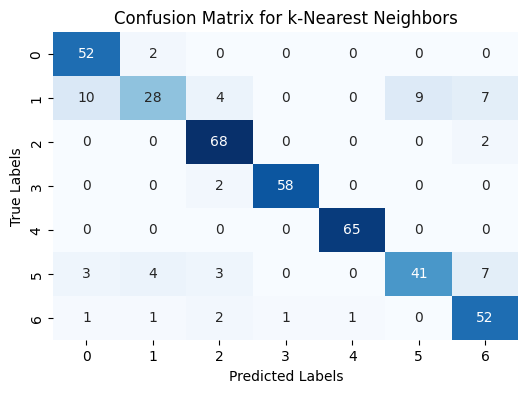

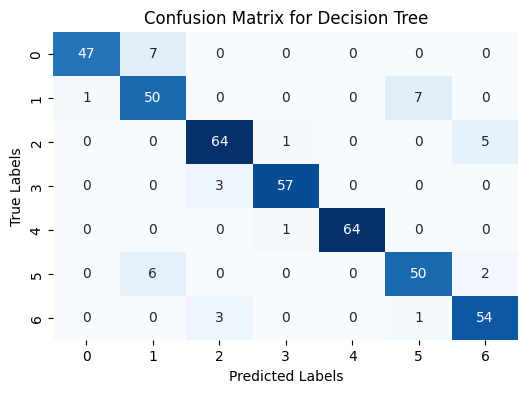

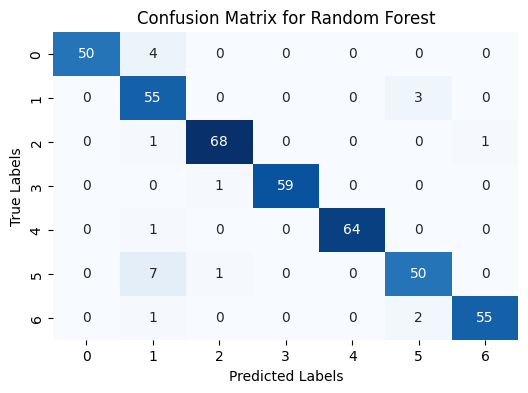

In [55]:
def plot_confusion_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
    plt.title(f"Confusion Matrix for {model_name}")
    plt.show()

# Plot Confusion Matrices
plot_confusion_matrix(y_eval, y_pred_knn, "k-Nearest Neighbors")
plot_confusion_matrix(y_eval, y_pred_dt, "Decision Tree")
plot_confusion_matrix(y_eval, y_pred_rf, "Random Forest")

###Evaluate Models (Classification)###

In [54]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Evaluation of the k-Nearest Neighbors (k-NN) model
print("KNN Classifier Evaluation:")
print("Accuracy:", accuracy_score(y_eval, y_pred_knn))
print("Classification Report:\n", classification_report(y_eval, y_pred_knn))
print("Confusion Matrix:\n", confusion_matrix(y_eval, y_pred_knn))

# Evaluation of Decision Tree model
print("\nDecision Tree Classifier Evaluation:")
print("Accuracy:", accuracy_score(y_eval, y_pred_dt))
print("Classification Report:\n", classification_report(y_eval, y_pred_dt))
print("Confusion Matrix:\n", confusion_matrix(y_eval, y_pred_dt))

# Random Forest model evaluation
print("\nRandom Forest Classifier Evaluation:")
print("Accuracy:", accuracy_score(y_eval, y_pred_rf))
print("Classification Report:\n", classification_report(y_eval, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_eval, y_pred_rf))


KNN Classifier Evaluation:
Accuracy: 0.8605200945626478
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.96      0.87        54
           1       0.80      0.48      0.60        58
           2       0.86      0.97      0.91        70
           3       0.98      0.97      0.97        60
           4       0.98      1.00      0.99        65
           5       0.82      0.71      0.76        58
           6       0.76      0.90      0.83        58

    accuracy                           0.86       423
   macro avg       0.86      0.86      0.85       423
weighted avg       0.86      0.86      0.85       423

Confusion Matrix:
 [[52  2  0  0  0  0  0]
 [10 28  4  0  0  9  7]
 [ 0  0 68  0  0  0  2]
 [ 0  0  2 58  0  0  0]
 [ 0  0  0  0 65  0  0]
 [ 3  4  3  0  0 41  7]
 [ 1  1  2  1  1  0 52]]

Decision Tree Classifier Evaluation:
Accuracy: 0.9125295508274232
Classification Report:
               precision    recall  f1-score 

###Comparison (Classification)###

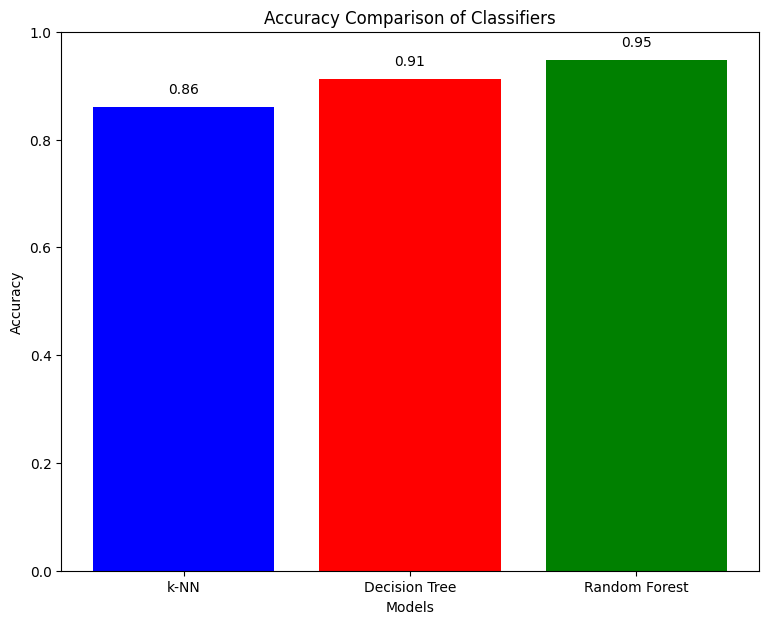

In [56]:
# Store the accuracy results of the models
accuracy_scores = {
    "k-NN": accuracy_score(y_eval, y_pred_knn),
    "Decision Tree": accuracy_score(y_eval, y_pred_dt),
    "Random Forest": accuracy_score(y_eval, y_pred_rf)
}

# Draw a bar chart to compare the accuracy of the models
plt.figure(figsize=(9, 7))
models = list(accuracy_scores.keys())
scores = list(accuracy_scores.values())
plt.bar(models, scores, color=['blue', 'red', 'green'])  # Using colors for models
plt.title('Accuracy Comparison of Classifiers')
plt.ylabel('Accuracy')
plt.xlabel('Models')
plt.ylim(0, 1)  # Set the y-axis range from 0 to 1
# Display values ​​on each column
for i, score in enumerate(scores):
    plt.text(i, score + 0.02, f'{score:.2f}', ha='center', va='bottom')
plt.show()


###Train Regression###

In [38]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

# KNN Regressor
knn_reg = KNeighborsRegressor(n_neighbors=3)
knn_reg.fit(X_train, y_train)
y_pred_knn = knn_reg.predict(X_eval)

# Decision Tree Regressor
dt_reg = DecisionTreeRegressor(random_state=42)
dt_reg.fit(X_train, y_train)
y_pred_dt = dt_reg.predict(X_eval)

# Linear Regression
lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)
y_pred_lr = lr_reg.predict(X_eval)

# Random Forest Regressor
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
rf_reg.fit(X_train, y_train)
y_pred_rf = rf_reg.predict(X_eval)


###Perform Regression###

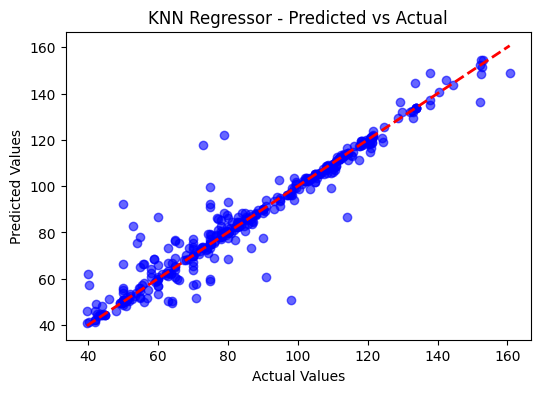

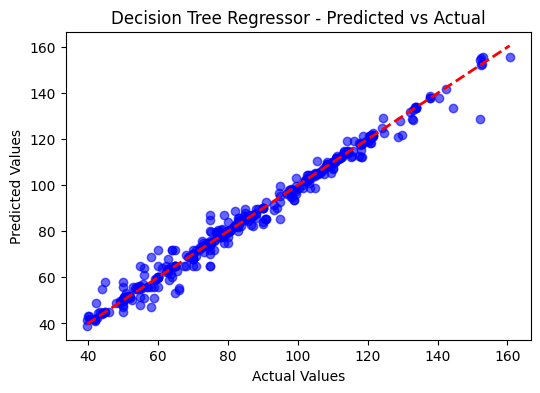

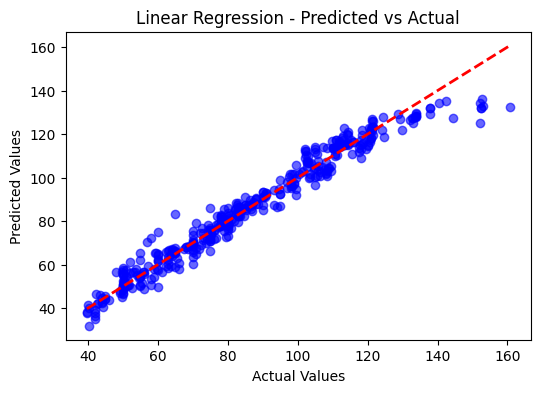

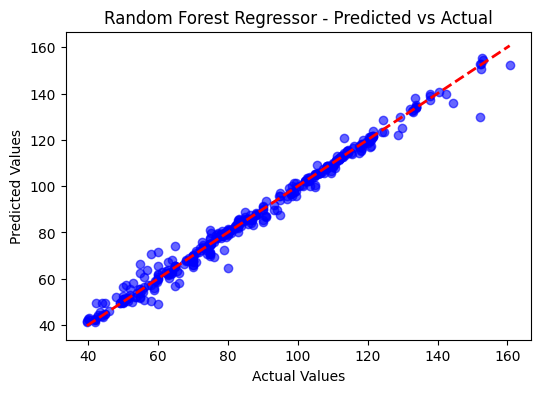

In [40]:
# Scatter Plot for each model
def plot_scatter(y_true, y_pred, model_name):
    plt.figure(figsize=(6, 4))
    plt.scatter(y_true, y_pred, color='blue', alpha=0.6)
    plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'r--', lw=2)
    plt.xlabel("Actual Values")
    plt.ylabel("Predicted Values")
    plt.title(f"{model_name} - Predicted vs Actual")
    plt.show()

plot_scatter(y_eval, y_pred_knn, "KNN Regressor")
plot_scatter(y_eval, y_pred_dt, "Decision Tree Regressor")
plot_scatter(y_eval, y_pred_lr, "Linear Regression")
plot_scatter(y_eval, y_pred_rf, "Random Forest Regressor")

###Evaluate Models (Regression)###



In [39]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# KNN Regressor Evaluation
print("KNN Regressor Evaluation:")
print("MAE:", mean_absolute_error(y_eval, y_pred_knn))
print("MSE:", mean_squared_error(y_eval, y_pred_knn))
print("R^2:", r2_score(y_eval, y_pred_knn))

# Evaluate Decision Tree Regressor
print("\nDecision Tree Regressor Evaluation:")
print("MAE:", mean_absolute_error(y_eval, y_pred_dt))
print("MSE:", mean_squared_error(y_eval, y_pred_dt))
print("R^2:", r2_score(y_eval, y_pred_dt))

# Linear Regression Evaluation
print("\nLinear Regression Evaluation:")
print("MAE:", mean_absolute_error(y_eval, y_pred_lr))
print("MSE:", mean_squared_error(y_eval, y_pred_lr))
print("R^2:", r2_score(y_eval, y_pred_lr))

# Random Forest Regressor Evaluation
print("\nRandom Forest Regressor Evaluation:")
print("MAE:", mean_absolute_error(y_eval, y_pred_rf))
print("MSE:", mean_squared_error(y_eval, y_pred_rf))
print("R^2:", r2_score(y_eval, y_pred_rf))


KNN Regressor Evaluation:
MAE: 3.205159675334909
MSE: 48.83608516511175
R^2: 0.9307398554003723

Decision Tree Regressor Evaluation:
MAE: 1.874043638297872
MSE: 11.124491314566134
R^2: 0.9842230622205036

Linear Regression Evaluation:
MAE: 3.6871539114325995
MSE: 26.798031780856153
R^2: 0.9619945876117552

Random Forest Regressor Evaluation:
MAE: 1.6389828069976395
MSE: 8.169722071663506
R^2: 0.9884135648852866


###Comparison (Regression)###

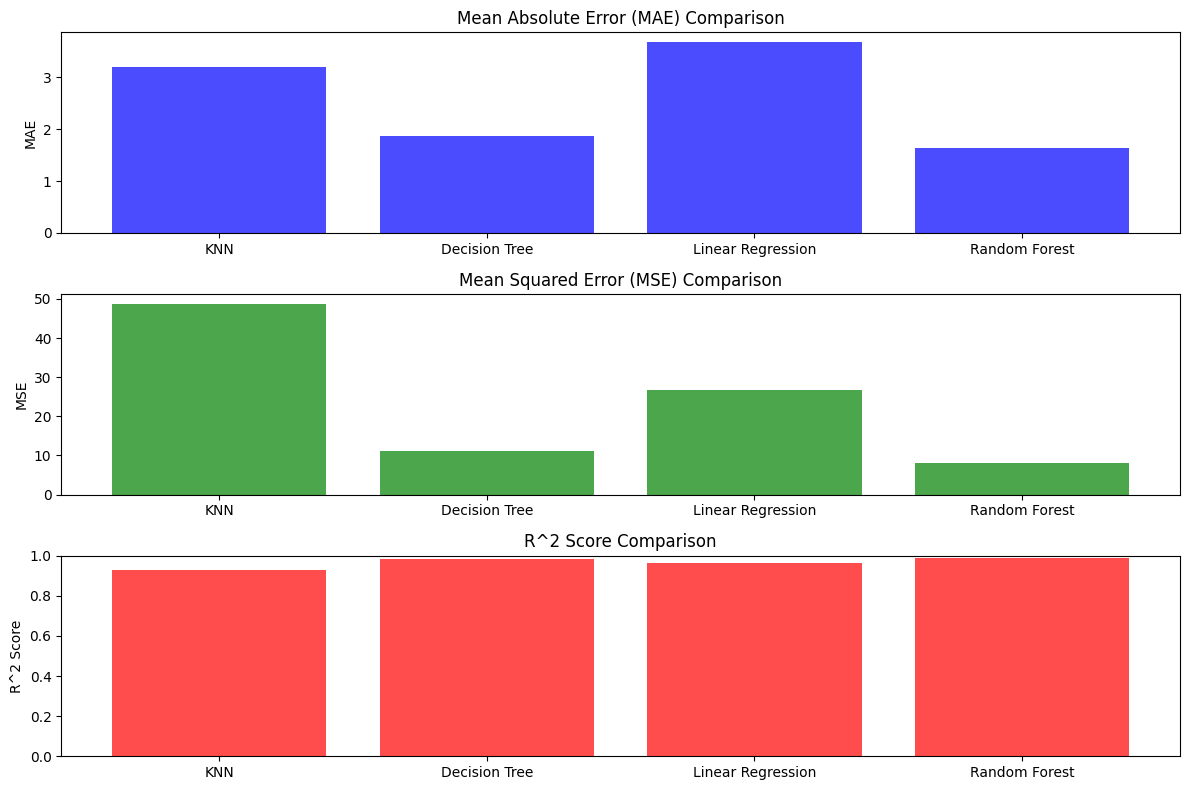

In [41]:
import numpy as np

# Calculate evaluation indexes for each model
models = ['KNN', 'Decision Tree', 'Linear Regression', 'Random Forest']
mae_values = [
    mean_absolute_error(y_eval, y_pred_knn),
    mean_absolute_error(y_eval, y_pred_dt),
    mean_absolute_error(y_eval, y_pred_lr),
    mean_absolute_error(y_eval, y_pred_rf)
]
mse_values = [
    mean_squared_error(y_eval, y_pred_knn),
    mean_squared_error(y_eval, y_pred_dt),
    mean_squared_error(y_eval, y_pred_lr),
    mean_squared_error(y_eval, y_pred_rf)
]
r2_values = [
    r2_score(y_eval, y_pred_knn),
    r2_score(y_eval, y_pred_dt),
    r2_score(y_eval, y_pred_lr),
    r2_score(y_eval, y_pred_rf)
]

# Draw a chart comparing the evaluation indicators
plt.figure(figsize=(12, 8))

# MAE comparison
plt.subplot(3, 1, 1)
plt.bar(models, mae_values, color='blue', alpha=0.7)
plt.ylabel('MAE')
plt.title('Mean Absolute Error (MAE) Comparison')

# MSE comparison
plt.subplot(3, 1, 2)
plt.bar(models, mse_values, color='green', alpha=0.7)
plt.ylabel('MSE')
plt.title('Mean Squared Error (MSE) Comparison')

# R^2 comparison
plt.subplot(3, 1, 3)
plt.bar(models, r2_values, color='red', alpha=0.7)
plt.ylabel('R^2 Score')
plt.title('R^2 Score Comparison')
plt.ylim(0, 1)  # R^2 typically ranges from 0 to 1 for regression

# Adjust layout
plt.tight_layout()
plt.show()


#Question 2#

In [57]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import Ridge

# Use K-fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

if task_type == "classification":
  # Apply Cross-validation on KNN_Classification model
  knn_scores = cross_val_score(knn, X_train, y_train, cv=kf)
  print("KNN Cross-Validation Mean Accuracy:", knn_scores.mean())

  # Apply Cross-validation on Decision Tree_Classification model
  dt_scores = cross_val_score(dt, X_train, y_train, cv=kf)
  print("Decision Tree Cross-Validation Mean Accuracy:", dt_scores.mean())

  # Apply Cross-validation on Random Forest_Classification model
  rf_scores = cross_val_score(rf, X_train, y_train, cv=kf)
  print("Random Forest Cross-Validation Mean Accuracy:", rf_scores.mean())

  # Tune hyperparameters for Decision Tree to avoid overfitting
  dt_tuned = DecisionTreeClassifier(max_depth=5, min_samples_leaf=10, random_state=42)
  dt_tuned.fit(X_train, y_train)
  dt_tuned_scores = cross_val_score(dt_tuned, X_train, y_train, cv=kf)
  print("Tuned Decision Tree Cross-Validation Mean Accuracy:", dt_tuned_scores.mean())

  # Tuning hyperparameters for Random Forest to avoid overfitting
  rf_tuned = RandomForestClassifier(n_estimators=100, max_depth=10, min_samples_leaf=5, random_state=42)
  rf_tuned.fit(X_train, y_train)
  rf_tuned_scores = cross_val_score(rf_tuned, X_train, y_train, cv=kf)
  print("Tuned Random Forest Cross-Validation Mean Accuracy:", rf_tuned_scores.mean())

elif task_type == "regression":
  #Solve Overfitting Linear Regression
  # Apply Cross-validation on Linear Regression (before adding Regularization)
  lr_scores = cross_val_score(lr_reg, X_train, y_train, cv=kf)
  print("Linear Regression Cross-Validation Mean Accuracy:", lr_scores.mean())

  # Ridge Regression (L2 Regularization) for Linear Regression
  ridge = Ridge(alpha=1.0)  # Adjust alpha to change the level of regularization
  ridge.fit(X_train, y_train)
  ridge_scores = cross_val_score(ridge, X_train, y_train, cv=kf)
  print("Ridge Regression Cross-Validation Mean Accuracy:", ridge_scores.mean())



KNN Cross-Validation Mean Accuracy: 0.8376854599406528
Decision Tree Cross-Validation Mean Accuracy: 0.9342352466068512
Random Forest Cross-Validation Mean Accuracy: 0.9419503801380087
Tuned Decision Tree Cross-Validation Mean Accuracy: 0.8234614506698505
Tuned Random Forest Cross-Validation Mean Accuracy: 0.9152968236967325


##Comparison of Linear Regression and Ridge Regression##

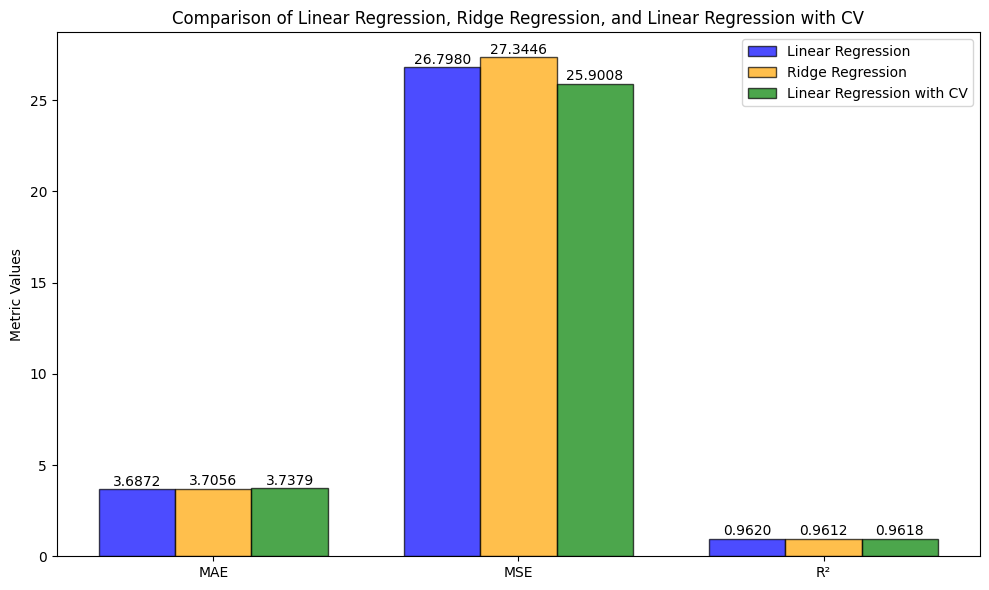

In [43]:
from sklearn.metrics import make_scorer

# Evaluation results of Linear Regression without regularization
mae_lr = mean_absolute_error(y_eval, y_pred_lr)
mse_lr = mean_squared_error(y_eval, y_pred_lr)
r2_lr = r2_score(y_eval, y_pred_lr)

# Define scoring metrics for cross-validation
mae_cv_lr = cross_val_score(lr_reg, X_train, y_train, cv=kf, scoring=make_scorer(mean_absolute_error)).mean()
mse_cv_lr = cross_val_score(lr_reg, X_train, y_train, cv=kf, scoring=make_scorer(mean_squared_error)).mean()
r2_cv_lr = cross_val_score(lr_reg, X_train, y_train, cv=kf, scoring=make_scorer(r2_score)).mean()

# Evaluation results of Ridge Regression with regularization
y_pred_ridge = ridge.predict(X_eval)
mae_ridge = mean_absolute_error(y_eval, y_pred_ridge)
mse_ridge = mean_squared_error(y_eval, y_pred_ridge)
r2_ridge = r2_score(y_eval, y_pred_ridge)

# Metrics for each model
metrics = ['MAE', 'MSE', 'R²']
lr_values = [mae_lr, mse_lr, r2_lr]
ridge_values = [mae_ridge, mse_ridge, r2_ridge]
lr_cv_values = [mae_cv_lr, mse_cv_lr, r2_cv_lr]

# Draw a bar chart for comparison
x = np.arange(len(metrics))  # Position of the metrics
width = 0.25  # Width of each bar

plt.figure(figsize=(10, 6))

# Plot bars for each model
bars1 = plt.bar(x - width, lr_values, width, label='Linear Regression', color='blue', alpha=0.7, edgecolor='black')
bars2 = plt.bar(x, ridge_values, width, label='Ridge Regression', color='orange', alpha=0.7, edgecolor='black')
bars3 = plt.bar(x + width, lr_cv_values, width, label='Linear Regression with CV', color='green', alpha=0.7, edgecolor='black')

# Add value labels on bars
for bars in [bars1, bars2, bars3]:
    for bar in bars:
        plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.02,
                 f'{bar.get_height():.4f}', ha='center', va='bottom', fontsize=10)

# Customize chart
plt.xticks(x, metrics)
plt.ylabel('Metric Values')
plt.title('Comparison of Linear Regression, Ridge Regression, and Linear Regression with CV')
plt.legend()
plt.tight_layout()
plt.show()


##Comparison of Using/Not Using Cross-Validation (Classification)##

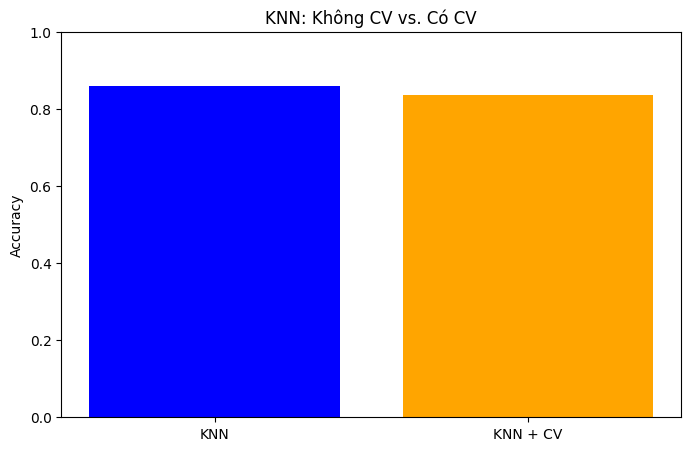

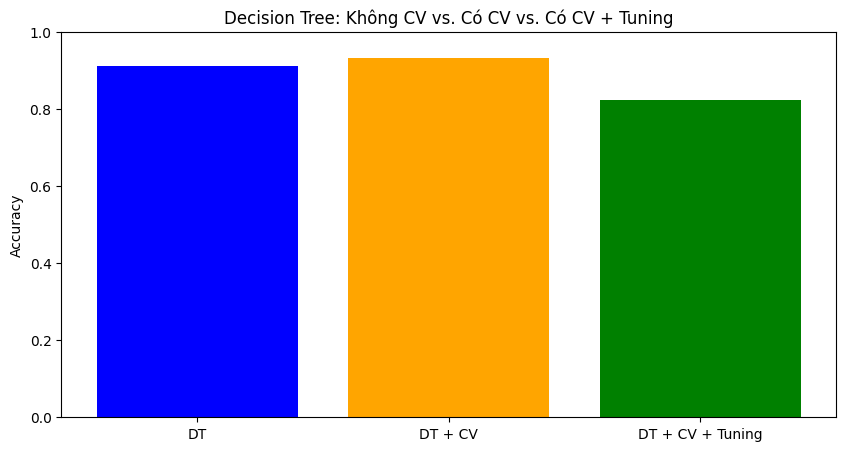

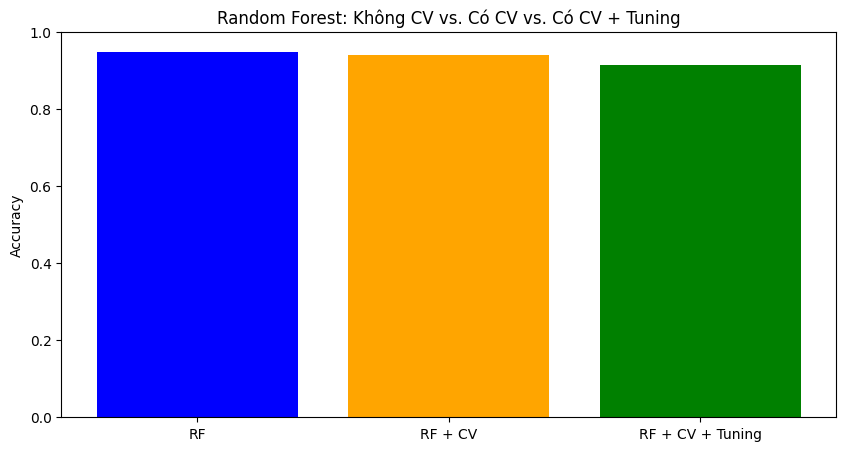

In [58]:
import matplotlib.pyplot as plt
import numpy as np

# Assume accuracy values ​​are calculated from the models
# Results from the cross-validation and model evaluation steps
knn_accuracy = accuracy_score(y_eval, y_pred_knn) # Accuracy KNN without cross-validation
knn_cv_accuracy = knn_scores.mean()  # Accuracy KNN with cross-validation

dt_accuracy = accuracy_score(y_eval, y_pred_dt)  # Accuracy Decision Tree without cross-validation
dt_cv_accuracy = dt_scores.mean()  # Accuracy Decision Tree with cross-validation
dt_tuned_cv_accuracy = dt_tuned_scores.mean()  # Accuracy Decision Tree with hyperparameter tuning

rf_accuracy = accuracy_score(y_eval, y_pred_rf)  # Accuracy Random Forest without cross-validation
rf_cv_accuracy = rf_scores.mean()  # Accuracy Random Forest with cross-validation
rf_tuned_cv_accuracy = rf_tuned_scores.mean()  # Accuracy Random Forest with hyperparameter tuning

# Create comparison charts

# 1. Comparison of KNN without and with cross-validation
plt.figure(figsize=(8, 5))
labels = ['KNN', 'KNN + CV']
values = [knn_accuracy, knn_cv_accuracy]
plt.bar(labels, values, color=['blue', 'orange'])
plt.ylim(0, 1)
plt.ylabel('Accuracy')
plt.title('KNN: Không CV vs. Có CV')
plt.show()

# 2. Comparing Decision Tree without and with cross-validation
plt.figure(figsize=(10, 5))
labels = ['DT', 'DT + CV', 'DT + CV + Tuning']
values = [dt_accuracy, dt_cv_accuracy, dt_tuned_cv_accuracy]
plt.bar(labels, values, color=['blue', 'orange', 'green'])
plt.ylim(0, 1)
plt.ylabel('Accuracy')
plt.title('Decision Tree: Không CV vs. Có CV vs. Có CV + Tuning')
plt.show()

#3. Comparing Random Forest without and with cross-validation
plt.figure(figsize=(10, 5))
labels = ['RF', 'RF + CV', 'RF + CV + Tuning']
values = [rf_accuracy, rf_cv_accuracy, rf_tuned_cv_accuracy]
plt.bar(labels, values, color=['blue', 'orange', 'green'])
plt.ylim(0, 1)
plt.ylabel('Accuracy')
plt.title('Random Forest: Không CV vs. Có CV vs. Có CV + Tuning')
plt.show()


#Question 3 (Feature selection using correlation analysis)##

##Preprocess the data: type conversion and data normalization.##

Please enter the task type ('classification' or 'regression'): classification


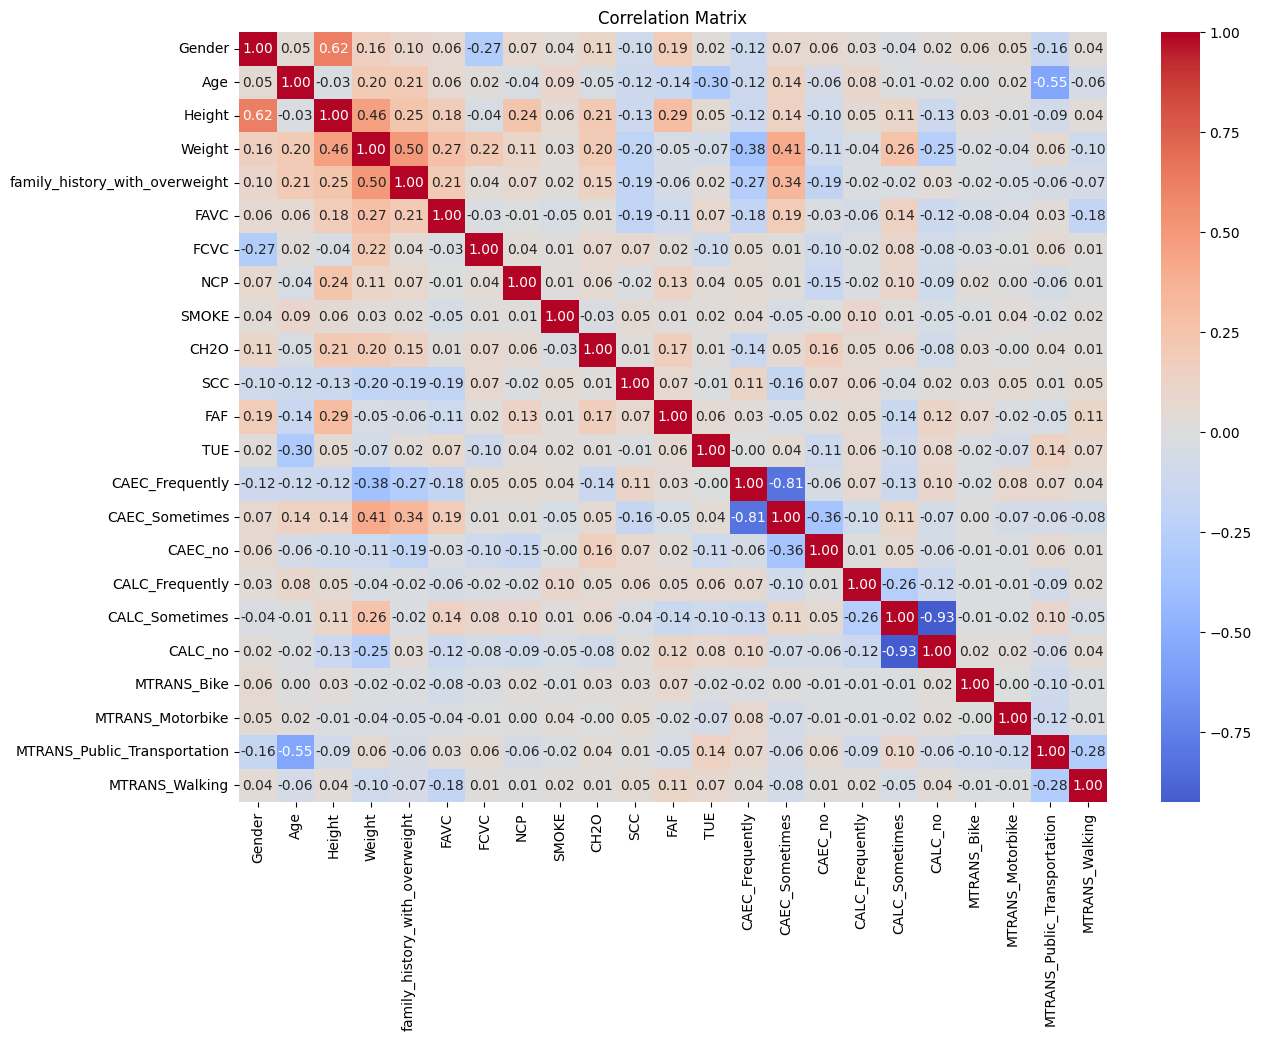

Dropped columns due to high correlation: []


In [59]:
# Copy initial data
data_processed_cau3 = data.copy()

# Step 1: Convert categorical variables to input features
label_encoder = LabelEncoder()
binary_vars = ['Gender', 'family_history_with_overweight', 'FAVC', 'SMOKE', 'SCC']

# Apply LabelEncoder to binary variables
for var in binary_vars:
    data_processed_cau3[var] = label_encoder.fit_transform(data_processed_cau3[var])

task_type = input("Please enter the task type ('classification' or 'regression'): ").strip().lower()

# Step 2: Feature Selection using Correlation Analysis
if task_type == "classification":
    # Use get_dummies for multi-class input variables (except 'NObeyesdad' which is the target column)
    data_processed_cau3 = pd.get_dummies(data_processed_cau3, columns=['CAEC', 'CALC', 'MTRANS'], drop_first=True)

    # Keep input features in X
    X = data_processed_cau3.drop('NObeyesdad', axis=1)
    # Tách biến mục tiêu 'NObeyesdad' và chuyển đổi thành nhãn số nếu cần
    y = label_encoder.fit_transform(data_processed_cau3['NObeyesdad'])  # Mã hóa biến mục tiêu

    # Calculate the correlation matrix between features
    correlation_matrix = X.corr()
    plt.figure(figsize=(14, 10))
    sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', center=0)
    plt.title('Correlation Matrix')
    plt.show()

    # Remove features that are highly correlated with each other (threshold > 0.9)
    upper_tri = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))
    to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.9)]
    X = X.drop(columns=to_drop)
    print("Dropped columns due to high correlation:", to_drop)

    # Standardize continuous variables
    scaler = StandardScaler()
    continuous_vars = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']
    X[continuous_vars] = scaler.fit_transform(X[continuous_vars])

elif task_type == "regression":
    # Use get_dummies for multi-class input variables (except 'NObeyesdad' which is the target column)
    data_processed_cau3 = pd.get_dummies(data_processed_cau3, columns=['CAEC', 'CALC', 'MTRANS', 'NObeyesdad'], drop_first=True)

    X = data_processed_cau3.drop('Weight', axis=1)
    y = data_processed_cau3['Weight']

    # Calculate the correlation matrix between features
    correlation_matrix = X.corr()
    plt.figure(figsize=(16, 12))
    sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', center=0, linewidths=0.5)
    plt.title('Correlation Matrix')
    plt.show()

    # Remove features that are highly correlated with each other (threshold > 0.9)
    upper_tri = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))
    to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.9)]
    X = X.drop(columns=to_drop)
    print("Dropped columns due to high correlation:", to_drop)

    # Standardize continuous variables
    scaler = StandardScaler()
    continuous_vars = ['Age', 'Height', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']
    X[continuous_vars] = scaler.fit_transform(X[continuous_vars])

##Split the data into training and evaluation sets.##

In [60]:
# Split the data into train set and evaluation set
if task_type == "classification":
    X_train, X_eval, y_train, y_eval = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
elif task_type == "regression":
    X_train, X_eval, y_train, y_eval = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the size of the data sets
print("Train set size (X_train):", X_train.shape)
print("Evaluation set size (X_eval):", X_eval.shape)
print("Train set size (y_train):", y_train.shape)
print("Evaluation set size (y_eval):", y_eval.shape)

Train set size (X_train): (1688, 23)
Evaluation set size (X_eval): (423, 23)
Train set size (y_train): (1688,)
Evaluation set size (y_eval): (423,)


##Train Classification##

In [61]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Train k-Nearest Neighbors (k-NN) Classifier
knn = KNeighborsClassifier(n_neighbors=3)  #k=3
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_eval)

# Train Decision Tree Classifier
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_eval)

# Train Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_eval)

##Perform Classification##

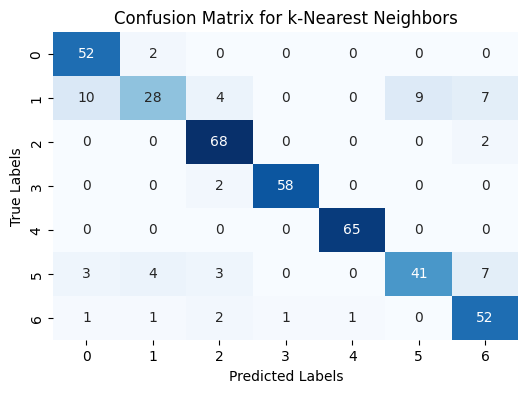

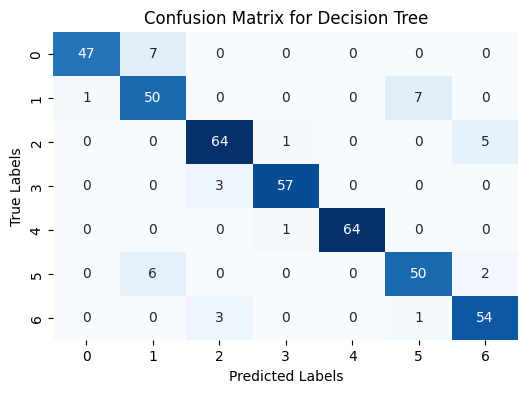

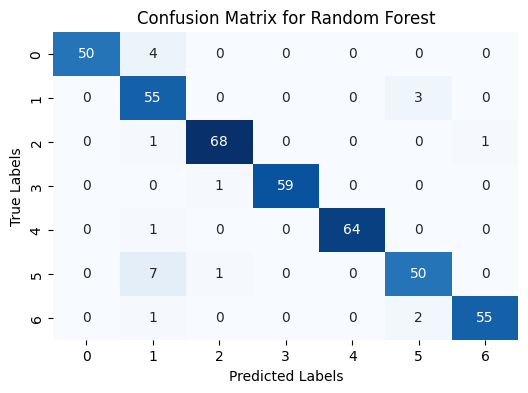

In [63]:
def plot_confusion_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
    plt.title(f"Confusion Matrix for {model_name}")
    plt.show()

# Plot Confusion Matrices
plot_confusion_matrix(y_eval, y_pred_knn, "k-Nearest Neighbors")
plot_confusion_matrix(y_eval, y_pred_dt, "Decision Tree")
plot_confusion_matrix(y_eval, y_pred_rf, "Random Forest")

##Evaluate Models (Classification)##

In [62]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Evaluation of the k-Nearest Neighbors (k-NN) model
print("KNN Classifier Evaluation:")
print("Accuracy:", accuracy_score(y_eval, y_pred_knn))
print("Classification Report:\n", classification_report(y_eval, y_pred_knn))
print("Confusion Matrix:\n", confusion_matrix(y_eval, y_pred_knn))

# Evaluation of Decision Tree model
print("\nDecision Tree Classifier Evaluation:")
print("Accuracy:", accuracy_score(y_eval, y_pred_dt))
print("Classification Report:\n", classification_report(y_eval, y_pred_dt))
print("Confusion Matrix:\n", confusion_matrix(y_eval, y_pred_dt))

# Random Forest model evaluation
print("\nRandom Forest Classifier Evaluation:")
print("Accuracy:", accuracy_score(y_eval, y_pred_rf))
print("Classification Report:\n", classification_report(y_eval, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_eval, y_pred_rf))


KNN Classifier Evaluation:
Accuracy: 0.8605200945626478
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.96      0.87        54
           1       0.80      0.48      0.60        58
           2       0.86      0.97      0.91        70
           3       0.98      0.97      0.97        60
           4       0.98      1.00      0.99        65
           5       0.82      0.71      0.76        58
           6       0.76      0.90      0.83        58

    accuracy                           0.86       423
   macro avg       0.86      0.86      0.85       423
weighted avg       0.86      0.86      0.85       423

Confusion Matrix:
 [[52  2  0  0  0  0  0]
 [10 28  4  0  0  9  7]
 [ 0  0 68  0  0  0  2]
 [ 0  0  2 58  0  0  0]
 [ 0  0  0  0 65  0  0]
 [ 3  4  3  0  0 41  7]
 [ 1  1  2  1  1  0 52]]

Decision Tree Classifier Evaluation:
Accuracy: 0.9125295508274232
Classification Report:
               precision    recall  f1-score 

##Train Regression##

In [47]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

# KNN Regressor
knn_reg = KNeighborsRegressor(n_neighbors=3)
knn_reg.fit(X_train, y_train)
y_pred_knn = knn_reg.predict(X_eval)

# Decision Tree Regressor
dt_reg = DecisionTreeRegressor(random_state=42)
dt_reg.fit(X_train, y_train)
y_pred_dt = dt_reg.predict(X_eval)

# Linear Regression
lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)
y_pred_lr = lr_reg.predict(X_eval)

# Random Forest Regressor
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
rf_reg.fit(X_train, y_train)
y_pred_rf = rf_reg.predict(X_eval)

##Perform Regression##

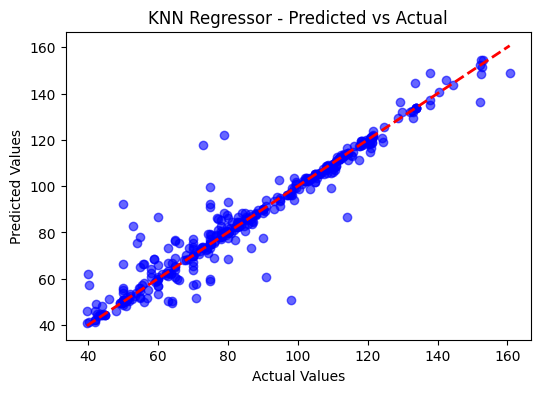

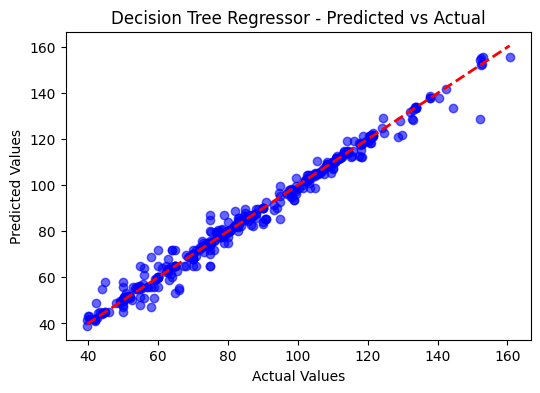

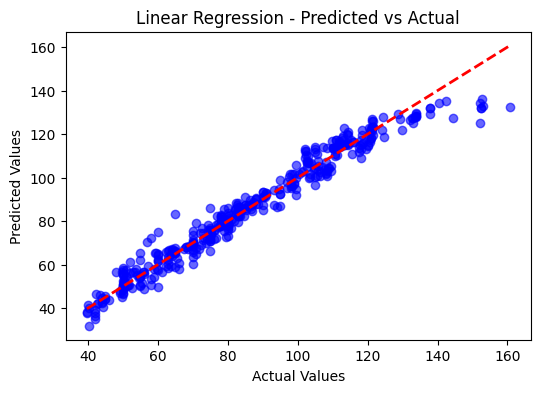

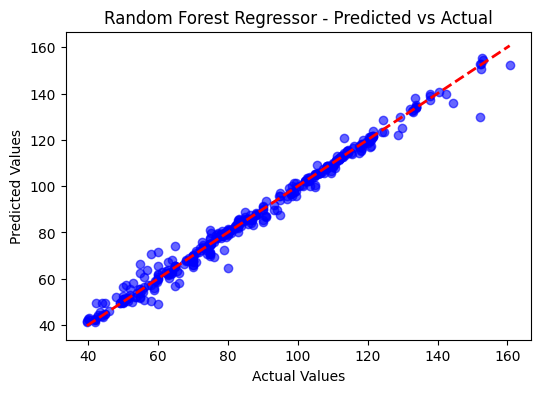

In [49]:
# Scatter Plot for each model
def plot_scatter(y_true, y_pred, model_name):
    plt.figure(figsize=(6, 4))
    plt.scatter(y_true, y_pred, color='blue', alpha=0.6)
    plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'r--', lw=2)
    plt.xlabel("Actual Values")
    plt.ylabel("Predicted Values")
    plt.title(f"{model_name} - Predicted vs Actual")
    plt.show()

plot_scatter(y_eval, y_pred_knn, "KNN Regressor")
plot_scatter(y_eval, y_pred_dt, "Decision Tree Regressor")
plot_scatter(y_eval, y_pred_lr, "Linear Regression")
plot_scatter(y_eval, y_pred_rf, "Random Forest Regressor")

##Evaluate Models (Regression)

In [48]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Evaluate KNN Regressor
print("KNN Regressor Evaluation:")
print("MAE:", mean_absolute_error(y_eval, y_pred_knn))
print("MSE:", mean_squared_error(y_eval, y_pred_knn))
print("R^2:", r2_score(y_eval, y_pred_knn))

# Evaluate Decision Tree Regressor
print("\nDecision Tree Regressor Evaluation:")
print("MAE:", mean_absolute_error(y_eval, y_pred_dt))
print("MSE:", mean_squared_error(y_eval, y_pred_dt))
print("R^2:", r2_score(y_eval, y_pred_dt))

# Evaluate Linear Regression
print("\nLinear Regression Evaluation:")
print("MAE:", mean_absolute_error(y_eval, y_pred_lr))
print("MSE:", mean_squared_error(y_eval, y_pred_lr))
print("R^2:", r2_score(y_eval, y_pred_lr))

# Evaluate Random Forest Regressor
print("\nRandom Forest Regressor Evaluation:")
print("MAE:", mean_absolute_error(y_eval, y_pred_rf))
print("MSE:", mean_squared_error(y_eval, y_pred_rf))
print("R^2:", r2_score(y_eval, y_pred_rf))


KNN Regressor Evaluation:
MAE: 3.205159675334909
MSE: 48.83608516511175
R^2: 0.9307398554003723

Decision Tree Regressor Evaluation:
MAE: 1.874043638297872
MSE: 11.124491314566134
R^2: 0.9842230622205036

Linear Regression Evaluation:
MAE: 3.6871539114325995
MSE: 26.798031780856153
R^2: 0.9619945876117552

Random Forest Regressor Evaluation:
MAE: 1.6389828069976395
MSE: 8.169722071663506
R^2: 0.9884135648852866
